In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l
'''默认在plot时直接在你的python console里面生成图像
导入rando
'''


D:\Ananconda\envs\pytorch\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: [WinError 126] 找不到指定的模块。
  warn(f"Failed to load image Python extension: {e}")


'默认在plot时直接在你的python console里面生成图像\n导入rando\n'

In [5]:
def synthetic_data(w,b,num_examples):
    """生成y=Xw+b+噪声"""
    X = torch.normal(0,1,(num_examples,len(w)))
    y = torch.matmul(X,w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
"""生成了一组数据集"""
len(labels)



1000

In [12]:
print('features:',features[0],'\nlabel:',labels[0])


features: tensor([ 0.1092, -1.8386]) 
label: tensor([10.6694])


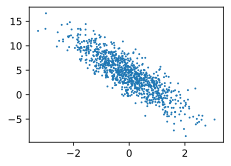

In [13]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(),labels.detach().numpy(),1);


In [33]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices],labels[batch_indices]
batch_size = 10

for X,y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.2026,  0.4197],
        [ 1.0556,  0.0795],
        [ 0.0347, -1.6063],
        [ 0.9386, -0.6013],
        [-1.0878,  0.5238],
        [ 1.1527,  1.6457],
        [ 1.2267,  1.7823],
        [ 0.5411,  0.8261],
        [-0.2957, -0.7044],
        [ 0.6849, -0.9679]]) 
 tensor([[2.3566],
        [6.0416],
        [9.7216],
        [8.1129],
        [0.2497],
        [0.9048],
        [0.6006],
        [2.4651],
        [5.9883],
        [8.8590]])


In [47]:
y=wx+b
w = torch.normal(0, 0.01, size=(2, 1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [39]:
def linreg(X, w, b):
    """线性回归模型"""
    return torch.matmul(X, w) + b

In [26]:
def squared_loss(y_hat, y):
    """均方损失"""
    return(y_hat - y.reshape(y_hat.shape))**2 / 2

In [35]:
def sgd(params, lr, batch_size):
    """小批量随机梯度下降(优化算法)params是一个参数list包含w和b，lr是学习率"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [48]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
        
    with torch.no_grad(): 
        train_l = loss(net(features, w, b),labels)
        print(f'epoch{epoch + 1}, loss {float(train_l.mean()):f}')

epoch1, loss 0.037742
epoch2, loss 0.000136
epoch3, loss 0.000051


In [20]:
print(f'w的估计误差： {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差：{true_b - b}')

w的估计误差： tensor([-0.0001, -0.0004], grad_fn=<SubBackward0>)
b的估计误差：tensor([0.0007], grad_fn=<RsubBackward1>)


In [21]:
p=data_iter(batch_size, features, labels)
p

<generator object data_iter at 0x00000197183FF5C8>